# Explore the correlation between News Headlines and U.S. Stock Market

## Table of content
<ol type="1", style="font-size:110%;">
  <strong><li>Overview</li></strong>
  <strong><li>Data Preparation</li></strong>
  <ol>
  <li>Collection - Stock Index data</li>
  <li>Scrapping - News Headlines data</li>
  <li>Preprocessing</li>
  </ol>
  <strong><li>Data understanding and visualization</li></strong>
  <ol>
  <li>Stock market Trend</li>
  <li>News Headline Sentiment Analysis</li>
  <li>WordCloud</li>
  </ol>
</ol>

## Overview
<p style="font-size:110%;"> It’s well known that news will have significant impact on stock market since news reflect the recent the world environment and trend, which the stock market is verty sensetive to. Therefore, in our final project, we would like to look deeper into the relationship between the news and the stock market. To be more specific, we will use the headlines of news from past 5 years and the well known stock market index - DJIA and NASDQUE to see how the news headline is linked to the change in the stock market. For the news headline data source, we will do web scrapping from Reddits. For the stock market index - DJIA and NASDQUE, we will download it from Yahoo finance. Since to predict the exactly amount of the change in stock market is extremly hard, in our project, we will try to predict the movement of the stock market only. To be more specific, we will label the stock market index data with the label to indicate whether there is a rise or a drop in the stock market index. To examine the relationship between news and stock market movement, we will use text anlytics technique such as sentiment analysis, bag of words and so on to try to dig out whether news headline will affect the stock market and if yes, how will it affect the stock market. 
</p>

## Data Preparation
### Collection - Stock Index data
<p style="font-size:110%;">We choose NASDAQ Composite index (NASDQUE) and Dow Johns Industrial Average (DJIA) index to be our stock index data since these two index represents two types of stock markets. For NASDAQ, it represents the general environment and condiciton of the stock in USA. For DJIA, it represents the stock market of traditional and large enterprises such as Microsoft. We hope that using these two index will give us more information about the whole stock market and also to see if news headline will have difference effects on these two indexes. 
	We downloaded NASDAQ Composite index (NASDQUE) and Dow Johns Industrial Average (DJIA) index between October 3, 2011 and October  31, 2016 from <a href="https://www.finance.yahoo.com/">https://www.finance.yahoo.com</a>
</p>

![title](stockNews.png)

### Scrapping - News Headlines data
<p style="font-size:110%;">We scrapped averagely twenty five news a day from Reddits. We at first set the number of news as 25 in the script, but the actual dates of news are slightly different from the search dates set for about 2 out of 25 news which may be resulted from the difference between time of editing news and that of posting news. 
</p>

[<img  src="http://www.webpagefx.com/blog/wp-content/uploads/2014/03/worldnews-new-1024x395.png
">](http://www.webpagefx.com/blog/wp-content/uploads/2014/03/worldnews-new-1024x395.png)


### Preprocessing
<p style="font-size:110%;">Concerning stock index data, we added everyday data with positive or negative label based on its change in index compared with the day before.
Concerning news headlines data, we first tokenized news using tokenize from nltk and then lemmatize news. In order to focus on words with useful meanings, we removed stopwords from nltk.corpus. </p>

In [1]:
import csv
import nltk
import string
import pandas as pd
from nltk import tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment.util import *
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.sentiment.vader import SentimentIntensityAnalyzer

//anaconda/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
def preProcess(text, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    """ Normalizes case and handles punctuation
    Inputs:
        text: str: raw text
        lemmatizer: an instance of a class implementing the lemmatize() method
                    (the default argument is of type nltk.stem.wordnet.WordNetLemmatizer)
    Outputs:
        list(str): tokenized text
    """
    text = text.lower()
    text = text.replace('\'s','')
    text = text.replace('\'','')
    for punc in string.punctuation:
    	text = text.replace(punc,' ')

    tokens = nltk.word_tokenize(text)
    lem_tokens=[]
    for token in tokens:
    	try:
    		token = lemmatizer.lemmatize(token)
    		lem_tokens.append(token)
    	except:
    		lem_tokens.append('')
    lem_tokens = list(filter(None, lem_tokens)) 

    return lem_tokens
    pass


def dataPreparation(file_path):
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(["ha", "u"])
    news = []
    dict_news = defaultdict(list)   
    with open(file_path) as f:
        reader = csv.reader(f)
        for row in reader:
            news.append(row)      
            if(len(row)!=2):
                print(row)
            
    sentences = []
    for news_day in news:
        process_headline = preProcess(news_day[1])
        process_string = ' '.join(process_headline)
        sentences.append(mark_negation(process_headline))
        dict_news[news_day[0]].append(process_string)    
    
    dict_news_nostop = defaultdict(list)
    for news_day in news:
        process_headline = preProcess(news_day[1])
        process_headline_no_stopword = []
        for word in process_headline:
            if(word not in stopwords):
                process_headline_no_stopword.append(word)
        process_string = ' '.join(process_headline_no_stopword)
        dict_news_nostop[news_day[0]].append(process_string)
        
    sentiment = {}
    date = []
    neg = []
    pos = []
    sid = SentimentIntensityAnalyzer()
    for day in dict_news:
        date.append(day)
        ss = sid.polarity_scores(str(dict_news_nostop[day]))
        sentiment[day] = ss
        neg.append(ss["neg"])
        pos.append(ss["pos"])
    return sentiment, date, neg, pos, dict_news, dict_news_nostop

In [3]:
sentiment, date, neg, pos, dict_news, dict_news_nostop = dataPreparation("news_headline.csv")


### Data understanding and visualization
#### Stock market Trend
<p style="font-size:110%;">We first examine the stock market trend based on these two indexes. </p>


In [4]:
def showStockPlot(file_path):
    stock = pd.DataFrame.from_csv(file_path, header=0,index_col=False)
    stock[["Date"]] = stock[["Date"]].astype("datetime64") 
    plt.plot(stock[["Date"]], stock[["NASDQUE"]],stock[["Date"]],stock[["DJIA"]])
    plt.show()

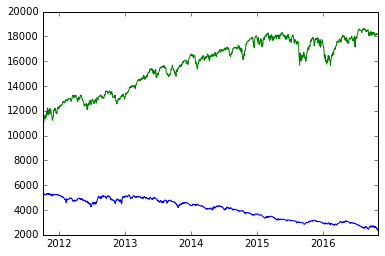

In [5]:
%matplotlib inline
showStockPlot('Stock_Price.csv')

### News Headline Sentiment Analysis
<p style="font-size:110%;">We use the package of the sentiment analysis from nltk including nltk.sentiment.util and nltk.sentiment.vader to examine the sentiment of every day news headline. We aggregate the news headline we collected by date, remove the stopwords and apply to the sentiment analysis function of nltk. For each date, we will have scores for negative, positive and neutral. </p>


In [6]:
def sentimentPlot(date, neg, pos):
    plot = pd.DataFrame({"date": date, "neg": neg, "pos": pos}, columns=["date","neg", "pos"])
    plot[["date"]] = plot[["date"]].astype("datetime64")
    plot = plot.sort("date")
    plt.plot(plot[["date"]], plot[["neg"]],plot[["date"]],plot[["pos"]])
    plt.show()
    

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


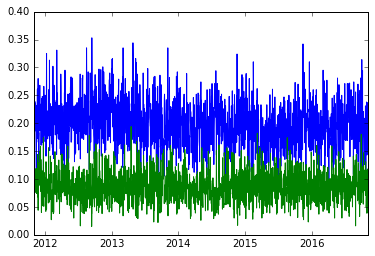

In [7]:
sentimentPlot(date, neg, pos)

<p style="font-size:110%;">As you can see, most of them have the same trend: the score of netrual > the score of negative > the score of positive. However, we can still see the trend of the score of negative and the score of positive. </p>

### WordCloud
<p style="font-size:110%;">Based on different label, we want to see if there is significant difference of high frequency words set between them. Based on our label and stock market index, we have 4 word sets: Positive of NASDQUE, Negative of NASDQUE, Positive of DJIA and Negative of DJIA. </p>

In [8]:
def getWordCloud(file_path, dict_news_nostop):
    trend = {}
    with open(file_path) as f:
        reader = csv.reader(f)
        for row in reader:
            trend[row[0]] = row[-1]
    positive = ""
    negative = ""
    for day in trend:
        if(trend[day]=='+'):
            current = ' '.join(dict_news_nostop[day])
            positive += (' '+current)
            #NASDQUE_positive.append(dict_news[day])
        if(trend[day]=='-'):
            current = ' '.join(dict_news_nostop[day])
            negative += (' '+current)      
            #NASDQUE_negative.append(dict_news[day])

    return positive, negative

def drawWordCloud(string):
    wordcloud = WordCloud(max_font_size=40).generate(string)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

//anaconda/lib/python2.7/site-packages/PIL/ImageDraw.py:99: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


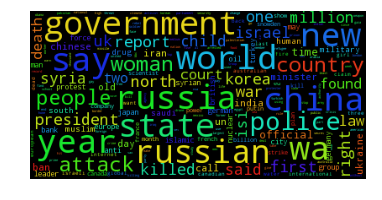

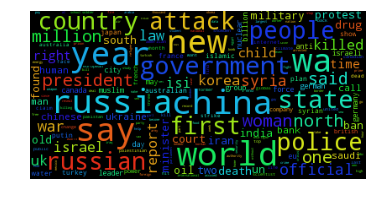

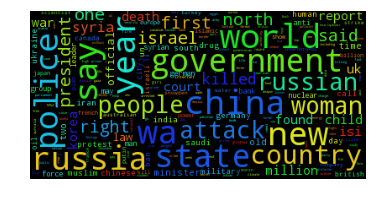

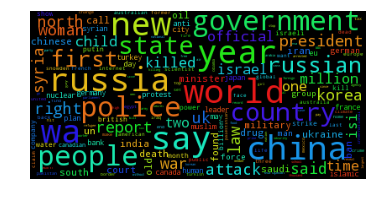

In [9]:
DJIA_pos, DJIA_neg = getWordCloud("DJIA_trend.csv", dict_news_nostop)
NASDQUE_pos, NASDQUE_neg = getWordCloud("NASDQUE_trend.csv", dict_news_nostop)
for name in [DJIA_pos, DJIA_neg, NASDQUE_pos, NASDQUE_neg]:
    drawWordCloud(name)

<p style="font-size:110%;">As you can see, the word cloud of positive and negative words sets are not that different.</p>